# Transition from order to chaos (graph)

* Dist. input: [-1,1]
* % inputs: 66% 
* Dist. Win: -1 o +1 
* in scaling: 0.05 
* Dist. W: rand[0,1] 
* num. trials: 50 

In [1]:
# -*- coding: utf-8 -*-
from __future__ import division, print_function, absolute_import

import numpy as np
import networkx as nx
import pandas as pd
import random
from scipy.spatial import distance



from reservoir_tools.utils import get_spectral_radius, nrmse, bisection, get_args_index, is_number
from reservoir_tools.control_graphs import control_graphs, randomize_network
from reservoir_tools.datasets import narma10, narma30
from reservoir_tools.tasks import memory_capacity, critical_memory_capacity
from reservoir_tools.readouts import LinearRegression, RidgeRegression
from reservoir_tools.reservoirs import simulate_reservoir_dynamics, remove_node, MLE
from reservoir_tools import grn_networks
from reservoir_tools import network_tools as nt
from reservoir_tools.network_statistics import average_degree, connectivity_fraction
from reservoir_tools.load_preserving_sign import load_preserving_signs

In [2]:
array_SR_values, mean_lyap, desviaciones_lyap = np.loadtxt("Lyapunov_variedSR.txt", delimiter=' ', usecols=(0, 1,2), unpack=True,skiprows=1)

In [3]:
array_SR_values, mean_mem_cap, desviaciones_mem_cap = np.loadtxt("Critical_mem_variedSR.txt", delimiter=' ', usecols=(0, 1,2), unpack=True,skiprows=1)

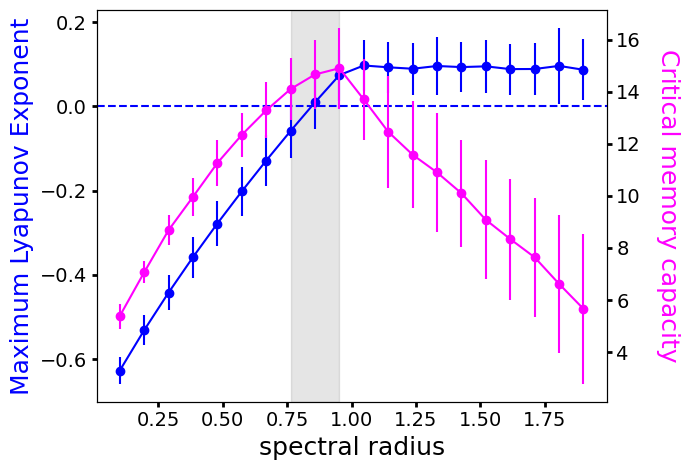

In [6]:
import matplotlib.pyplot as plt 
fig, ax1 = plt.subplots(figsize=(7.0, 4.8))

ax1.plot(array_SR_values , mean_lyap, "o",  color="blue")
ax1.errorbar(array_SR_values, mean_lyap, yerr=np.array(desviaciones_lyap), label='both limits (default)', color="blue")
ax1.axvspan(array_SR_values[int((np.abs(np.array(mean_lyap) - 0.0)).argmin())-1], array_SR_values[int((np.abs(np.array(mean_lyap) - 0.0)).argmin())+1], alpha=0.1, color='k')
ax1.axhline(y=0, ls="--", color = "blue")

ax1.set_xlabel('spectral radius', fontsize=18)
ax1.set_ylabel('Maximum Lyapunov Exponent', color="blue", fontsize=18)

ax2 = ax1.twinx()
ax2.plot(array_SR_values , mean_mem_cap, "o",  color="magenta")
ax2.errorbar(array_SR_values, mean_mem_cap, yerr=np.array(desviaciones_mem_cap), label='both limits (default)', color="magenta")

ax2.set_ylabel( "Critical memory capacity", color="magenta",alpha=1.0, fontsize=18, rotation=-90, labelpad=28)

#plt.title('High salt cultivated animals',fontweight="bold", fontsize=18, y=1.03)


ax2.tick_params(width=2, axis='both', which='major', labelsize=14)
ax1.tick_params(width=2, axis='both', which='major', labelsize=14)

plt.tight_layout()
#plt.savefig('lyapunov.png', dpi=300)
plt.savefig('lyapunov.pdf')
plt.show()

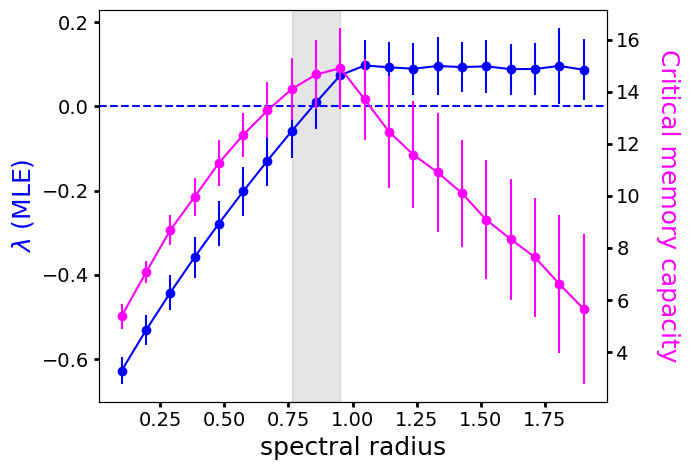

In [5]:
import matplotlib.pyplot as plt 
fig, ax1 = plt.subplots(figsize=(7.0, 4.8))

ax1.plot(array_SR_values , mean_lyap, "o",  color="blue")
ax1.errorbar(array_SR_values, mean_lyap, yerr=np.array(desviaciones_lyap), label='both limits (default)', color="blue")
ax1.axvspan(array_SR_values[int((np.abs(np.array(mean_lyap) - 0.0)).argmin())-1], array_SR_values[int((np.abs(np.array(mean_lyap) - 0.0)).argmin())+1], alpha=0.1, color='k')
ax1.axhline(y=0, ls="--", color = "blue")

ax1.set_xlabel('spectral radius', fontsize=18)
ax1.set_ylabel(r'$\lambda$ (MLE)', color="blue", fontsize=18)

ax2 = ax1.twinx()
ax2.plot(array_SR_values , mean_mem_cap, "o",  color="magenta")
ax2.errorbar(array_SR_values, mean_mem_cap, yerr=np.array(desviaciones_mem_cap), label='both limits (default)', color="magenta")

ax2.set_ylabel( "Critical memory capacity", color="magenta",alpha=1.0, fontsize=18, rotation=-90, labelpad=28)

#plt.title('High salt cultivated animals',fontweight="bold", fontsize=18, y=1.03)


ax2.tick_params(width=2, axis='both', which='major', labelsize=14)
ax1.tick_params(width=2, axis='both', which='major', labelsize=14)

plt.tight_layout()
#plt.savefig('lyapunov.png', dpi=300)
plt.savefig('lyapunov.pdf')
plt.show()

# Figura Morales para ejemplificar

* Dist. input: [-1,1] 
* % inputs: 66% 
* Dist. Win: [-1 ; +1 ] 
* in scaling: 0.5 
* Dist. W: rand[0.0,1] 
* SR = [0.5, 0.95, 1.4] 

In [8]:
inputs_SR= []
res_dynamics_SR=[]

In [9]:
inputs_SR_48, mean_lyap_48 = np.loadtxt("0_48.txt", delimiter=' ', usecols=(0, 1), unpack=True)

In [10]:
array_SR_values_49, mean_lyap_49 = np.loadtxt("0_49.txt", delimiter=' ', usecols=(0, 1), unpack=True)

In [11]:
array_SR_values_56, mean_lyap_56 = np.loadtxt("0_56.txt", delimiter=' ', usecols=(0, 1), unpack=True)

In [12]:
inter_inputs = []
inter_inputs.append(inputs_SR_48)
inter_inputs.append(array_SR_values_49)
inter_inputs.append(array_SR_values_56)

In [13]:
inter_res_dyn = []
inter_res_dyn.append(mean_lyap_48)
inter_res_dyn.append(mean_lyap_49)
inter_res_dyn.append(mean_lyap_56)

In [14]:
inputs_SR.append(inter_inputs)
res_dynamics_SR.append(inter_res_dyn)

In [15]:
inputs_SR_48, mean_lyap_48 = np.loadtxt("1_48.txt", delimiter=' ', usecols=(0, 1), unpack=True)

In [16]:
array_SR_values_49, mean_lyap_49 = np.loadtxt("1_49.txt", delimiter=' ', usecols=(0, 1), unpack=True)

In [17]:
array_SR_values_56, mean_lyap_56 = np.loadtxt("1_56.txt", delimiter=' ', usecols=(0, 1), unpack=True)

In [18]:
inter_inputs = []
inter_inputs.append(inputs_SR_48)
inter_inputs.append(array_SR_values_49)
inter_inputs.append(array_SR_values_56)

In [19]:
inter_res_dyn = []
inter_res_dyn.append(mean_lyap_48)
inter_res_dyn.append(mean_lyap_49)
inter_res_dyn.append(mean_lyap_56)

In [20]:
inputs_SR.append(inter_inputs)
res_dynamics_SR.append(inter_res_dyn)

In [21]:
inputs_SR_48, mean_lyap_48 = np.loadtxt("2_48.txt", delimiter=' ', usecols=(0, 1), unpack=True)

In [22]:
array_SR_values_49, mean_lyap_49 = np.loadtxt("2_49.txt", delimiter=' ', usecols=(0, 1), unpack=True)

In [23]:
array_SR_values_56, mean_lyap_56 = np.loadtxt("2_56.txt", delimiter=' ', usecols=(0, 1), unpack=True)

In [24]:
inter_inputs = []
inter_inputs.append(inputs_SR_48)
inter_inputs.append(array_SR_values_49)
inter_inputs.append(array_SR_values_56)

In [25]:
inter_res_dyn = []
inter_res_dyn.append(mean_lyap_48)
inter_res_dyn.append(mean_lyap_49)
inter_res_dyn.append(mean_lyap_56)

In [26]:
inputs_SR.append(inter_inputs)
res_dynamics_SR.append(inter_res_dyn)

In [27]:
len(inputs_SR)

3

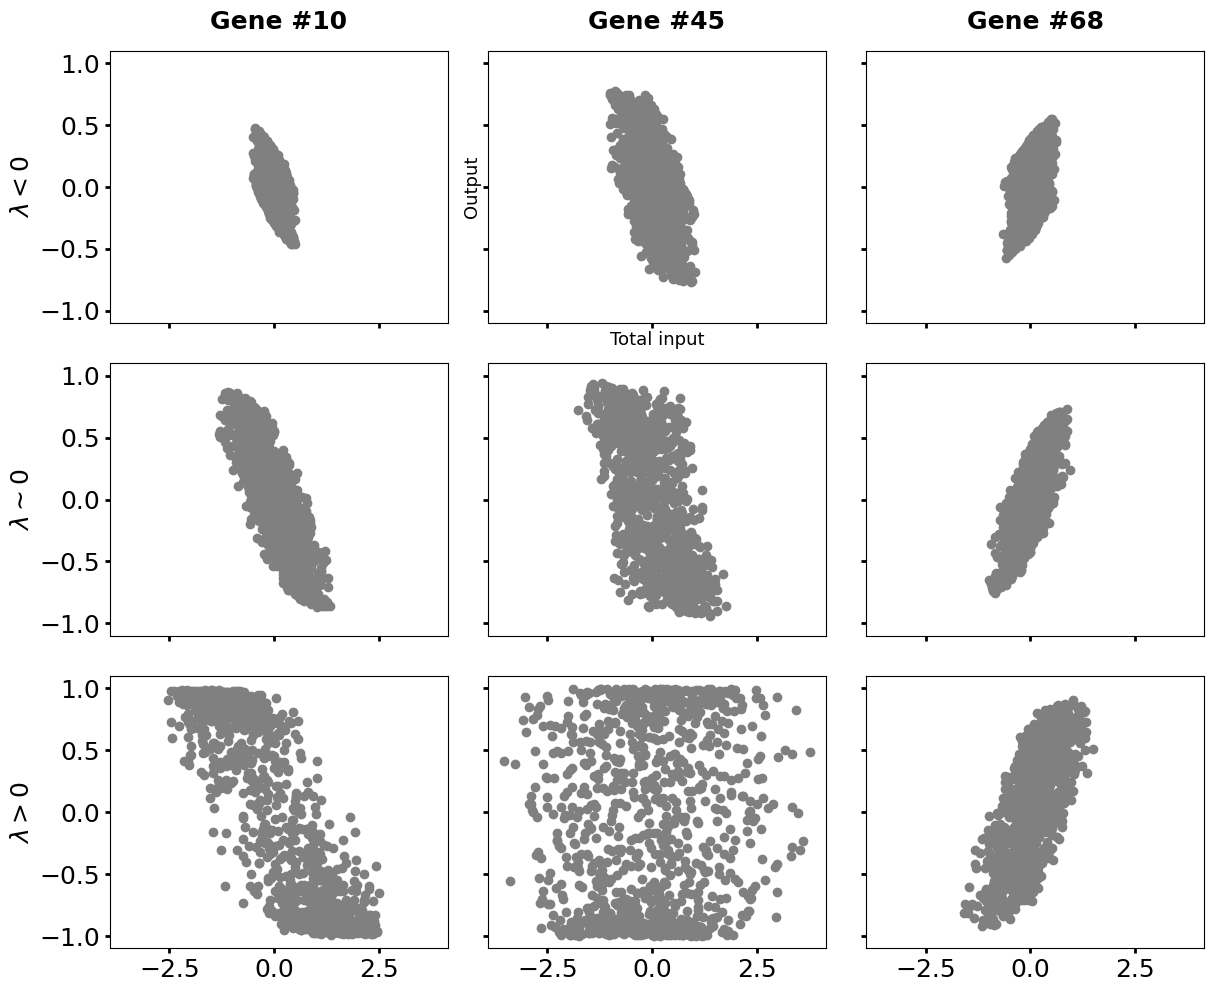

In [38]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10), sharex=True, sharey=True)


axes[0][0].set_title('Gene #10',fontweight="bold", fontsize=18, y=1.05)

axes[0][0].scatter(inputs_SR[0][0], res_dynamics_SR[0][0], color="grey", label = "input series 1")


axes[0][0].set_ylabel(r"$\lambda < 0$", fontsize=18)
axes[1][0].set_ylabel(r"$\lambda \sim 0$", fontsize=18) 
axes[2][0].set_ylabel(r"$\lambda > 0$", fontsize=18)  
# Ca


axes[1][0].scatter(inputs_SR[1][0], res_dynamics_SR[1][0], color="grey", label = "input series 1")


axes[2][0].scatter(inputs_SR[2][0], res_dynamics_SR[2][0], color="grey", label = "input series 1")


axes[0][1].set_title('Gene #45',fontweight="bold", fontsize=18, y=1.05)


axes[0][1].scatter(inputs_SR[0][1], res_dynamics_SR[0][1], color="grey", label = "input series 1")



axes[0][1].set_ylabel("Output", labelpad=2, size=13)
axes[0][1].set_xlabel("Total input", labelpad=2, size=13)


axes[1][1].scatter(inputs_SR[1][1], res_dynamics_SR[1][1], color="grey", label = "input series 1")

axes[2][1].scatter(inputs_SR[2][1], res_dynamics_SR[2][1], color="grey", label = "input series 1")


axes[0][2].set_title('Gene #68',fontweight="bold", fontsize=18, y=1.05)

axes[0][2].scatter(inputs_SR[0][2], res_dynamics_SR[0][2], color="grey", label = "input series 1")




axes[1][2].scatter(inputs_SR[1][2], res_dynamics_SR[1][2], color="grey", label = "input series 1")



axes[2][2].scatter(inputs_SR[2][2], res_dynamics_SR[2][2], color="grey", label = "input series 1")



for (m,n), subplot in np.ndenumerate(axes):
    subplot.tick_params(axis='both', which='major', labelsize=18)
    subplot.tick_params(width=2, axis='both', which='major', labelsize=18)

#plt.setp([a.get_xticklabels() for a in fig.axes[:-2]], visible=False)
#plt.setp([a.get_xticklabels() for a in fig.axes[7:8]], visible=True)

# set the spacing between subplots
fig.align_ylabels(axes[:, 0])
plt.tight_layout()
#plt.savefig("Fig_all.png", dpi=1000)
plt.savefig('lyapunov_dynamics.pdf',bbox_inches='tight')
plt.show()